# 1. Import Dependencies

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract

## 2.Read in image,Grayscale and Blur

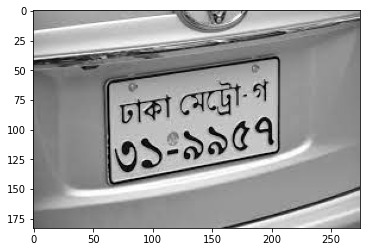

In [2]:
img = cv2.imread('car.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 3.Apply filter and find edges for localization

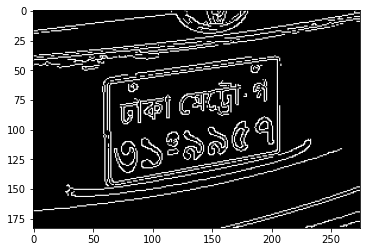

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 4.Find contors and apply mask

In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[205,  41]],

       [[ 65,  61]],

       [[ 66, 143]],

       [[204, 118]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

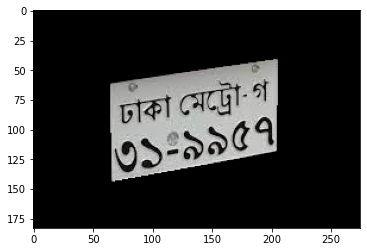

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

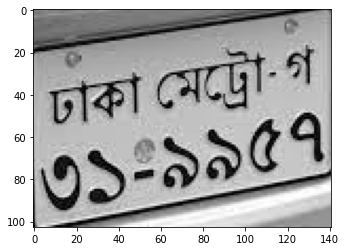

In [10]:
 plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# 5.Use pytesseract to read image

In [11]:
from PIL import Image    
import pytesseract

text= pytesseract.image_to_string(cropped_image, lang='ben')
print(text)

মেট্রোগ
৩১:৯৯৫৭

